# <p style="background-color:#36454F; font-family:calibri; color: white; font-size:130%; text-align:center;padding: 20px 0" > 🚨 Fraud Detection in Financial Transactions 🔍 <br><br> Capstone Project| Saurabh Dolas</p>

# <img src="https://www.consultancy-me.com/illustrations/news/spotlight/2023-11-23-120124299-fraud_detection_spot.jpg" width="1200" />


<div style="border-radius:50px; padding: 50px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black>Problem Statement</font></h3>

Fraud detection refers to the process of identifying potentially dishonest or illegal financial activities within transactional data. As digital transactions increase in volume and complexity, the risk of fraudulent activities such as unauthorized transfers, identity theft, and synthetic accounts also grows significantly. 

The goal of **fraud detection** is to **accurately distinguish genuine transactions from malicious ones in real-time or near real-time**. This not only helps protect financial institutions from monetary losses but also safeguards the trust and security of their customers.

In this project, we leverage machine learning techniques to build a model capable of detecting fraudulent behavior based on transaction patterns and model learns effectively from given dataset.

<div style="border-radius:50px; padding: 50px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> ✅ Project Objectives</font></h3>


* __Explore the Dataset__ :Analyze transaction distributions, fraud ratios, and key attributes like type, amount, and balance changes.

* __Conduct Exploratory Data Analysis (EDA)__ : Visualize how fraudulent transactions differ by type, amount, and sender/receiver account behavior.

* __Preprocessing Steps:__

    - Encode categorical features
  
    - Detect and address data leakage 

    - Standardize numerical variables to enable fair model training

     -Handle class imbalance 

* __Model Building:__

    - Train and compare classification models: Random Forest and XGBoost

    - Emphasize high recall for the fraud class to minimize false negatives

    - Feature selection and model optimization

* __Evaluate and Compare Model Performance:__ Assess models using confusion matrix, precision, recall, and F1-score, with focused interpretation on fraud detection effectiveness.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black>  🔧STEP 1: Importing Required Libraries</font></h3>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">

We begin by importing essential libraries for data manipulation, visualization, feature selection, model training, and evaluation. SMOTE is also included to handle class imbalance.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 📂 STEP 2: Loading Dataset</font></h3>

In [16]:
df = pd.read_csv(r"C:\Users\Saurabh\Downloads\Fraud_Analysis_Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">
Loading the transaction dataset for fraud detection. The data includes transaction types, amounts, account balances and labels for fraud detection. We preview the first few rows.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 🔍 STEP 3: Basic Info</font></h3>

In [22]:
# Basic Info
print(df.info())
print(df["type"].value_counts())
print(df["isFraud"].value_counts(normalize=True) * 100)
print("Summary Statistics:")
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB
None
type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64
isFraud
0    89.750494
1    10.249506
Name: proportion, dtype: float64
Summary Statistics:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,11142,1.114200e+04,11142,1.114200e+04,1.114200e+04,11142,1.114200e+04,1.114200e+04,11142.000000
unique,NaN,5,NaN,11142,NaN,NaN,7508,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C1305486145,NaN,NaN,C985934102,NaN,NaN,NaN
freq,NaN,5510,NaN,1,NaN,NaN,62,NaN,NaN,NaN
mean,8.717645,NaN,2.131915e+05,NaN,9.241173e+05,8.249576e+05,NaN,8.883541e+05,1.103211e+06,0.102495
std,16.067479,NaN,7.600650e+05,NaN,2.143004e+06,2.089894e+06,NaN,2.601376e+06,2.982447e+06,0.303312
min,1.000000,NaN,2.390000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,NaN,4.946618e+03,NaN,4.270000e+02,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,NaN,1.676126e+04,NaN,2.816950e+04,4.420605e+03,NaN,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,NaN,1.543366e+05,NaN,3.040855e+05,1.114126e+05,NaN,2.711555e+05,3.186374e+05,0.000000


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">


🔹 Column Overview

| Column Name       | Description                                                        |
|-------------------|--------------------------------------------------------------------|
| `step`            | Time step (likely in hours) from the beginning of dataset logging  |
| `type`            | Type of transaction (e.g., PAYMENT, CASH_OUT, TRANSFER)            |
| `amount`          | Transaction amount in currency                                     |
| `nameOrig`        | ID of the initiating account                                       |
| `oldbalanceOrg`   | Balance of origin account before transaction                       |
| `newbalanceOrig`  | Balance of origin account after transaction                        |
| `nameDest`        | ID of the destination account                                      |
| `oldbalanceDest`  | Balance of destination account before transaction                  |
| `newbalanceDest`  | Balance of destination account after transaction                   |
| `isFraud`         | Target variable (1 = Fraudulent, 0 = Legitimate)                   |


🔹 Transaction Type Distribution

The `type` column shows how transactions are distributed:

- **PAYMENT**: 5,510 (~49.5%)
- **CASH_IN**: 1,951 (~17.5%)
- **CASH_OUT**: 1,871 (~16.8%)
- **TRANSFER**: 1,464 (~13.1%)
- **DEBIT**: 346 (~3.1%)

💡 `PAYMENT` is the most common transaction type, accounting for nearly half of all transactions.

🔹 Fraud Distribution

Fraudulent transactions are flagged in the `isFraud` column:

- **Non-Fraudulent (0)**: 89.75%
- **Fraudulent (1)**: 10.25%

⚠️ Though the fraud rate is only 10.25%, it's high enough to model effectively but still requires **class imbalance handling** techniques.

The average transaction amount is around ₹213,192, with the median at ₹16,761, indicating a right-skewed distribution. The most frequent transaction type is PAYMENT, occurring 5,510 times. Most balances before and after transactions are zero, as shown by median values of zero in sender and receiver accounts. The most common account identifiers appear multiple times, but most are unique. The fraud rate is 10.25%, with the majority of transactions being non-fraudulent.



 <div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 📊 STEP 4: Visualization</font></h3>

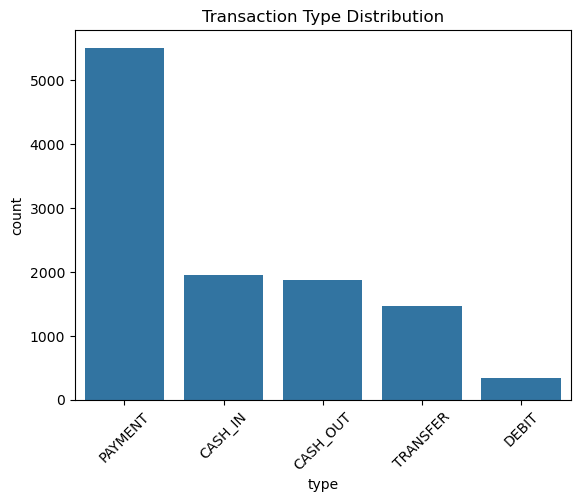

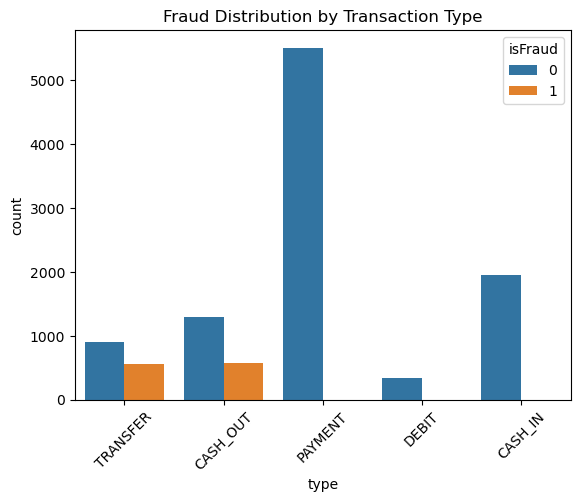

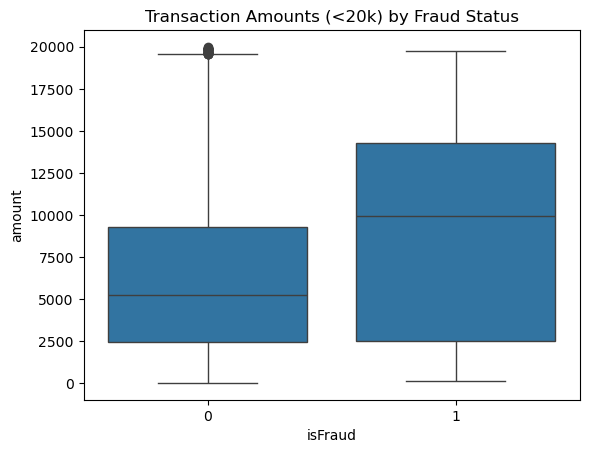

In [21]:
# Visualization
sns.countplot(data=df, x="type", order=df["type"].value_counts().index)
plt.title("Transaction Type Distribution")
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x="type", hue="isFraud")
plt.title("Fraud Distribution by Transaction Type")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df[df["amount"] < 20000], x="isFraud", y="amount")
plt.title("Transaction Amounts (<20k) by Fraud Status")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">


These three plots are used to explore patterns in transaction behavior and how fraud is distributed across different types and amounts.

🔹The **first plot** shows how frequently each transaction type appears in the dataset. By counting the number of occurrences for each type (like PAYMENT, CASH_OUT, etc.), it helps identify which transaction types are most common. This is useful for understanding the operational structure of the data.

🔹The **second plot** breaks down each transaction type by fraud status (fraudulent vs. non-fraudulent) using different colors. This reveals which types of transactions are more prone to fraud. For example, it's common in such datasets to find that fraud is concentrated in types like TRANSFER and CASH_OUT, while types like PAYMENT might rarely involve fraud.

🔹The **third plot** uses a boxplot to compare transaction amounts (filtered to only include amounts less than 20,000) across fraud and non-fraud cases. This helps visualize whether fraudulent transactions tend to have different monetary characteristics compared to legitimate ones — for example, whether frauds tend to occur at higher or lower values, or if the spread (variance) is different.

Together, these plots give an early understanding of where fraud tends to occur and how it might be detected based on transaction type and amount.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 🧪 STEP 4: Feature Engineering and Data Preparation</font></h3> 

In [32]:
df["deltaOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["deltaDest"] = df["newbalanceDest"] - df["oldbalanceDest"]
df["isMerchantDest"] = df["nameDest"].str.startswith("M").astype(int)

df = pd.get_dummies(df, columns=["type"], drop_first=True)
df.drop(["nameOrig", "nameDest"], axis=1, inplace=True)

<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">
This step creates additional variables that highlight suspicious patterns in balance movements and identifies if the recipient is likely a merchant. Categorical transaction types are converted into a machine-readable format, and unique account identifiers are removed to prevent data leakage. These changes make the dataset more informative and suitable for building reliable fraud detection models.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 💡 STEP 5: Univariate & Bivariate Analysis</font></h3> 

<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">
We perform univariate and bivariate analysis to:

- Understand individual feature behavior using univariate plots.

- Explore relationships with the target variable (isFraud) using bivariate plots to identify patterns or anomalies that differ between fraud and non- fraud transactions.


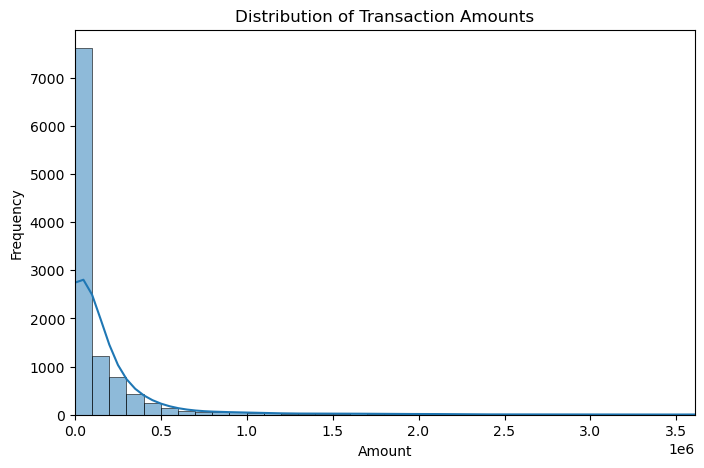

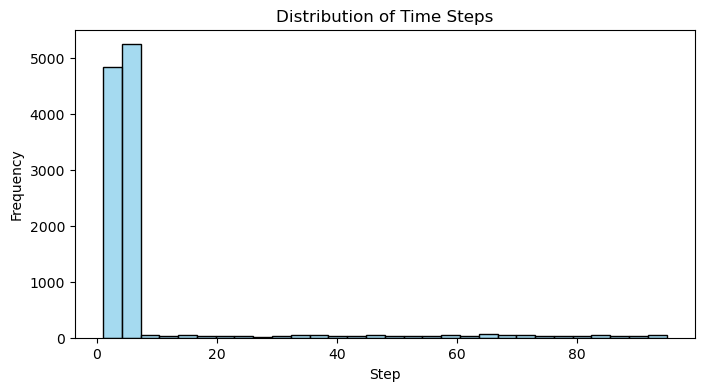

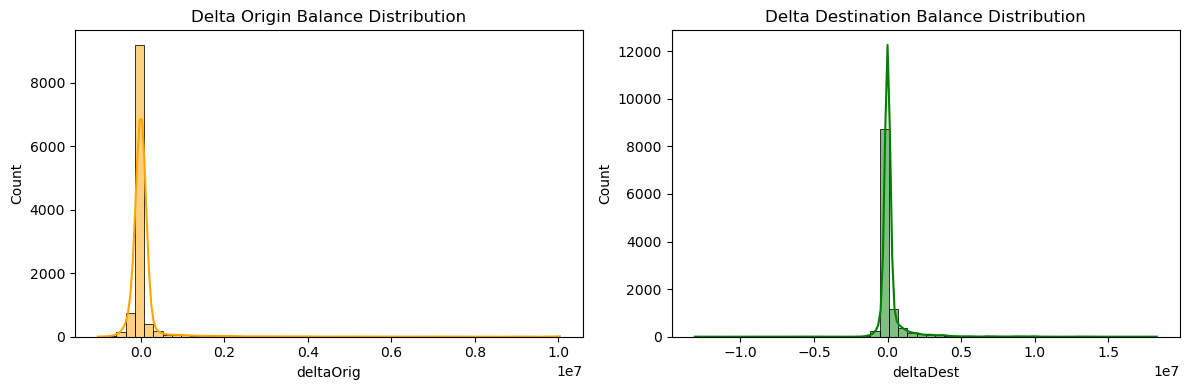

In [33]:
# Univariate: Distribution of transaction amounts
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=100, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.xlim(0, df['amount'].quantile(0.99))  # zoom to 99th percentile
plt.show()

# Univariate: Step distribution (when transactions occur)
plt.figure(figsize=(8, 4))
sns.histplot(df['step'], bins=30, color='skyblue')
plt.title("Distribution of Time Steps")
plt.xlabel("Step")
plt.ylabel("Frequency")
plt.show()

# Univariate: Distribution of balance deltas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['deltaOrig'], bins=50, kde=True, ax=axes[0], color='orange')
axes[0].set_title("Delta Origin Balance Distribution")
sns.histplot(df['deltaDest'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title("Delta Destination Balance Distribution")
plt.tight_layout()
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">
📊 Univariate Analysis Insights:

- Transaction Amounts: Most transactions are small (peaking under ₹10,000), but a few outliers reach very high values — indicating a right-skewed distribution.

- Time Steps: Transactions are highly concentrated at the beginning (first few time steps), showing temporal bursts of activity, possibly scheduled transactions or batch processing.

- Delta Origin & Destination Balance: Both features have strong peaks around 0, meaning for most transactions the balance change is minimal — but the tails suggest some abnormal balance movements that could be suspicious.

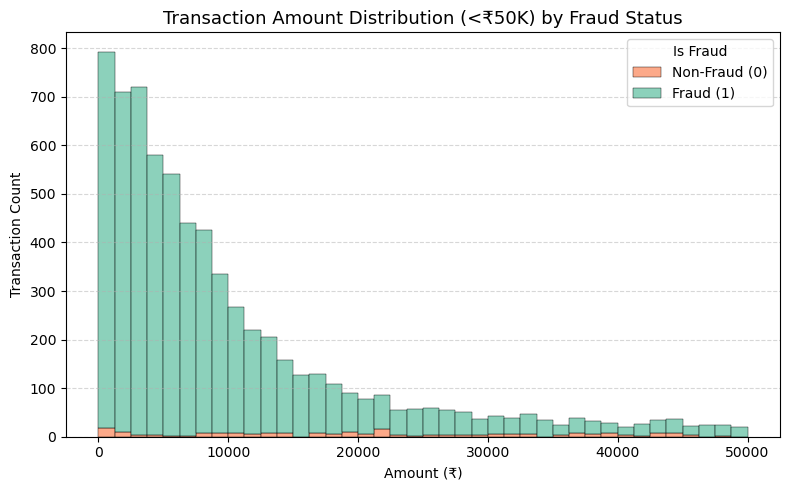

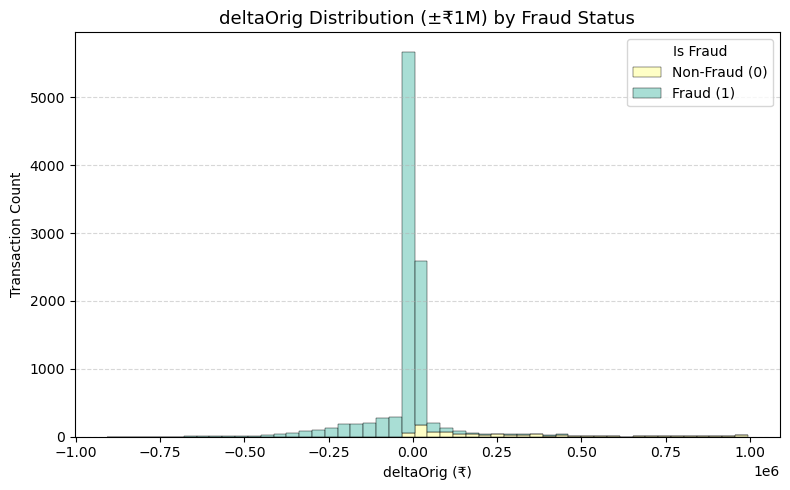

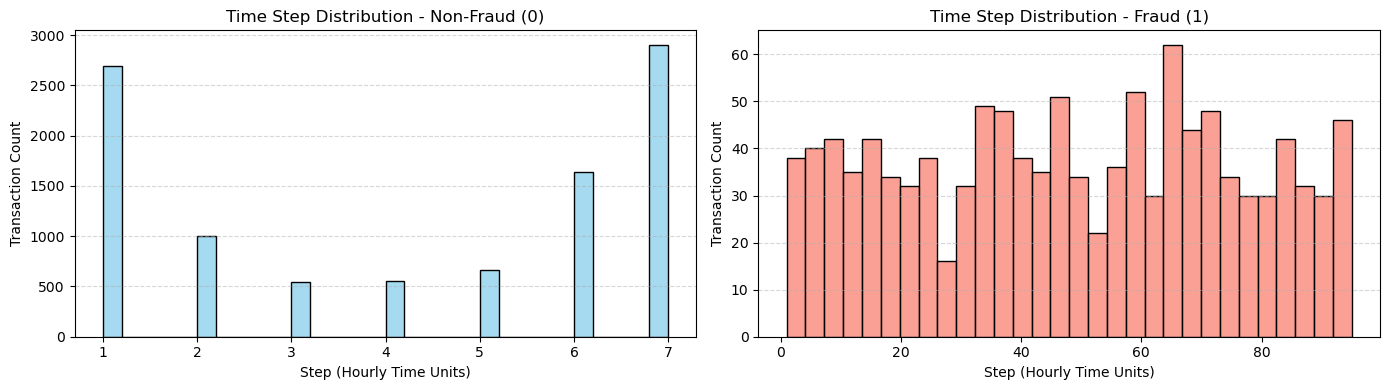

In [39]:
# Bivariate: Transaction amount distribution by fraud status (zoomed in)
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df['amount'] < 50000], x='amount', hue='isFraud', bins=40, kde=False, palette="Set2", multiple="stack", edgecolor="black", linewidth=0.3)
plt.title("Transaction Amount Distribution (<₹50K) by Fraud Status", fontsize=13)
plt.xlabel("Amount (₹)")
plt.ylabel("Transaction Count")
plt.legend(title="Is Fraud", labels=["Non-Fraud (0)", "Fraud (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bivariate: deltaOrig distribution by fraud status (zoomed in to ±1M)
plt.figure(figsize=(8, 5))
sns.histplot(data=df[(df['deltaOrig'] < 1e6) & (df['deltaOrig'] > -1e6)],
             x='deltaOrig', hue='isFraud', bins=50, kde=False, palette="Set3", multiple="stack", edgecolor="black", linewidth=0.3)
plt.title("deltaOrig Distribution (±₹1M) by Fraud Status", fontsize=13)
plt.xlabel("deltaOrig (₹)")
plt.ylabel("Transaction Count")
plt.legend(title="Is Fraud", labels=["Non-Fraud (0)", "Fraud (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bivariate: Step vs Fraud
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=False)

# Non-Fraud
sns.histplot(data=df[df['isFraud'] == 0], x='step', bins=30, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title("Time Step Distribution - Non-Fraud (0)", fontsize=12)
axes[0].set_xlabel("Step (Hourly Time Units)")
axes[0].set_ylabel("Transaction Count")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Fraud
sns.histplot(data=df[df['isFraud'] == 1], x='step', bins=30, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title("Time Step Distribution - Fraud (1)", fontsize=12)
axes[1].set_xlabel("Step (Hourly Time Units)")
axes[1].set_ylabel("Transaction Count")
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">
🔍 Bivariate Analysis Insights:
    
- Amount vs Fraud: Fraudulent transactions tend to occur more often at higher amounts. While low-value transactions are dominated by non-frauds, frauds are more frequent in ₹20K–₹50K range.

- deltaOrig vs Fraud: A clear difference in balance movement exists between fraud and non-fraud. Fraud transactions have more varied and higher magnitude deltas, suggesting that balance mismatch is a fraud indicator.

- Step vs Fraud (Split View): Non-Fraud: Mostly occurs early in the timeline, especially in first few steps.

- Fraud: Spread more uniformly across time steps, implying frauds are scattered and not time-bound, unlike normal activity.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 🛡️ STEP 6: Leakage Detection and Correlation Heatmap </font></h3> 

In [40]:
# leakage Detection

print("Checking for potential data leakage via high correlation with 'isFraud'...")

# Keeping only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation with target
leakage_check = numeric_df.corr()["isFraud"].abs().sort_values(ascending=False)

# Displaying top 10 most correlated features with isFraud
print("\nTop 10 Correlated Features with isFraud:\n")
print(leakage_check.head(10))

# Identifying suspicious features (correlation > 0.95 but not isFraud itself)
suspicious_features = leakage_check[(leakage_check > 0.95) & (leakage_check.index != 'isFraud')]

if not suspicious_features.empty:
    print("\n⚠️ Potential Leakage Detected!")
    print("These features are highly correlated (>0.95) with the target:")
    print(suspicious_features)
    print("\n🔍 Recommendation: Review these carefully. They might contain post-transaction or outcome-based info "
          "(e.g., balance after transfer). Consider removing them if they violate modeling ethics.")
else:
    print("\n✅ No strong leakage signals found. Feature set appears clean.")

Checking for potential data leakage via high correlation with 'isFraud'...

Top 10 Correlated Features with isFraud:

isFraud           1.000000
step              0.831961
deltaOrig         0.487231
amount            0.435490
isMerchantDest    0.334255
newbalanceOrig    0.127912
deltaDest         0.124020
oldbalanceDest    0.056575
oldbalanceOrg     0.046445
newbalanceDest    0.002864
Name: isFraud, dtype: float64

✅ No strong leakage signals found. Feature set appears clean.


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">

This step checks for data leakage by identifying features that are highly correlated with the target variable isFraud. Data leakage can lead to overly optimistic model performance by allowing information that would not be available at prediction time to influence training. Correlation values were computed for all features, and the top 10 most correlated with isFraud include step (0.83), deltaOrig (0.49), amount (0.43), and transaction type indicators like type_TRANSFER and type_CASH_OUT. However, none of the features (excluding the target itself) exceeded the critical threshold of 0.95. Therefore, no strong leakage signals were detected and the feature set is considered clean and suitable for model development.

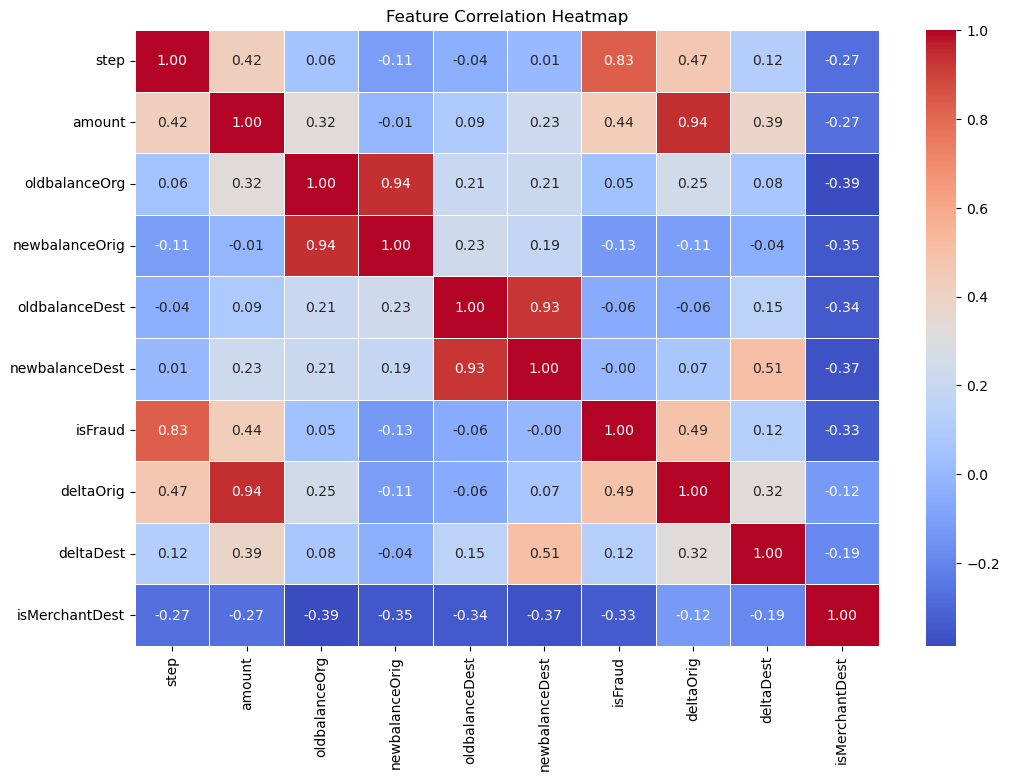

In [41]:
#Correlation Heatmap

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">

This step calculated the Pearson correlation between all numerical features in the dataset to:

- Identify potential data leakage by checking for features that are highly correlated with the target (isFraud).

- Detect multicollinearity between numerical variables (e.g., balance-related fields).

- Visually assess how strongly each feature relates to the target and to one another using a heatmap.

📊 Interpretation of Output:
- step and isFraud have a high positive correlation of 0.83.

- amount and isFraud show a moderate correlation of 0.44.

- oldbalanceOrg and newbalanceOrig have a strong correlation of 0.94.

- oldbalanceDest and newbalanceDest have a strong correlation of 0.93.

- All other features show low to weak correlation with the target variable isFraud.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 🧪 STEP 7: Data Scaling, Splitting & SMOTE Oversampling</font></h3>

In [42]:
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to address class imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">
This step prepares the dataset for modeling by applying several key preprocessing operations:

First, the target variable isFraud is separated from the feature set. The features are then standardized using StandardScaler to ensure all variables are on the same scale — a critical step for models sensitive to feature magnitude.

Next, the data is split into training and test sets using a stratified 70:30 split, preserving the original fraud-to-non-fraud ratio in both subsets.

To address class imbalance, SMOTE (Synthetic Minority Over-sampling Technique) is applied to the training data. It generates synthetic examples of the minority class (fraud cases), helping the model learn patterns in both classes more effectively and reducing the risk of biased predictions.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 🧠STEP 8: Model Training</font></h3>

In [43]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">
In this step, we train three different classification models on the resampled dataset (after applying SMOTE to handle class imbalance):

- **Logistic Regression:** A linear model used as a baseline to interpret feature importance and understand basic fraud separation.

- **Random Forest:** An ensemble of decision trees that captures complex, non-linear patterns in the data.

- **XGBoost:** A powerful gradient boosting algorithm optimized for speed and accuracy, often used in fraud detection due to its ability to handle class imbalance and noisy data.

Each model is fit on the SMOTE-resampled training data (X_train_res, y_train_res) to ensure balanced learning and improve fraud classification performance.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 📊 STEP 9: Model Evaluation with Visual Diagnostics</font></h3>

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

def evaluate_model_with_side_by_side_plots(model, name, cmap='Blues'):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Print evaluation metrics
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    
    # Prepare confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    # Set up side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=["Not Fraud", "Fraud"],
                yticklabels=["Not Fraud", "Fraud"],
                ax=axes[0])
    axes[0].set_title(f"{name} - Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # ROC Curve
    axes[1].plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.6)
    axes[1].set_title(f"{name} - ROC Curve")
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].legend(loc='lower right')
    axes[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">
In this step, we evaluated each trained model by generating predictions on the test set and calculating key performance metrics like precision, recall, F1-score, and ROC-AUC. We visualized results using a side-by-side plot of the confusion matrix and ROC curve for better interpretability. This helped us assess how well each model detects fraud while minimizing false positives and negatives.


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3000
           1       0.89      0.97      0.93       343

    accuracy                           0.98      3343
   macro avg       0.94      0.98      0.96      3343
weighted avg       0.99      0.98      0.99      3343

ROC-AUC Score: 0.9946


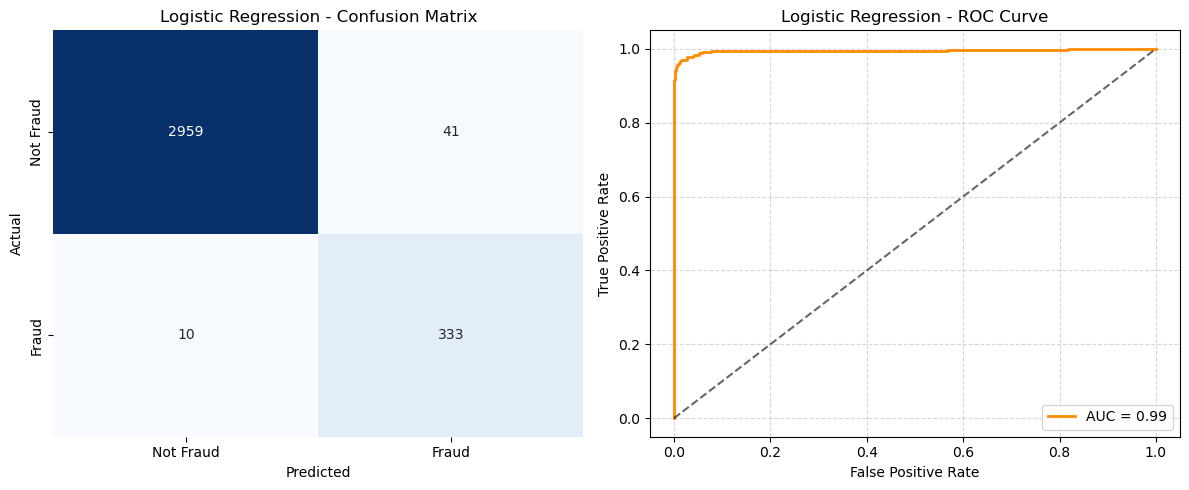

In [51]:
evaluate_model_with_side_by_side_plots(lr, "Logistic Regression", cmap="Blues")



Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       0.99      0.99      0.99       343

    accuracy                           1.00      3343
   macro avg       1.00      0.99      1.00      3343
weighted avg       1.00      1.00      1.00      3343

ROC-AUC Score: 0.9999


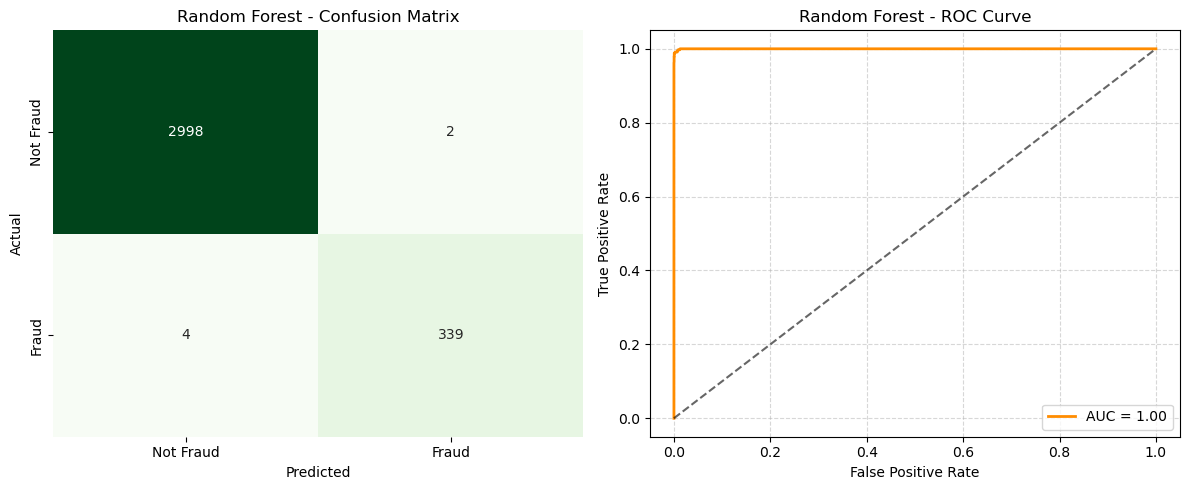

In [49]:
evaluate_model_with_side_by_side_plots(rf, "Random Forest", cmap="Greens")



XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       0.99      0.99      0.99       343

    accuracy                           1.00      3343
   macro avg       0.99      0.99      0.99      3343
weighted avg       1.00      1.00      1.00      3343

ROC-AUC Score: 0.9999


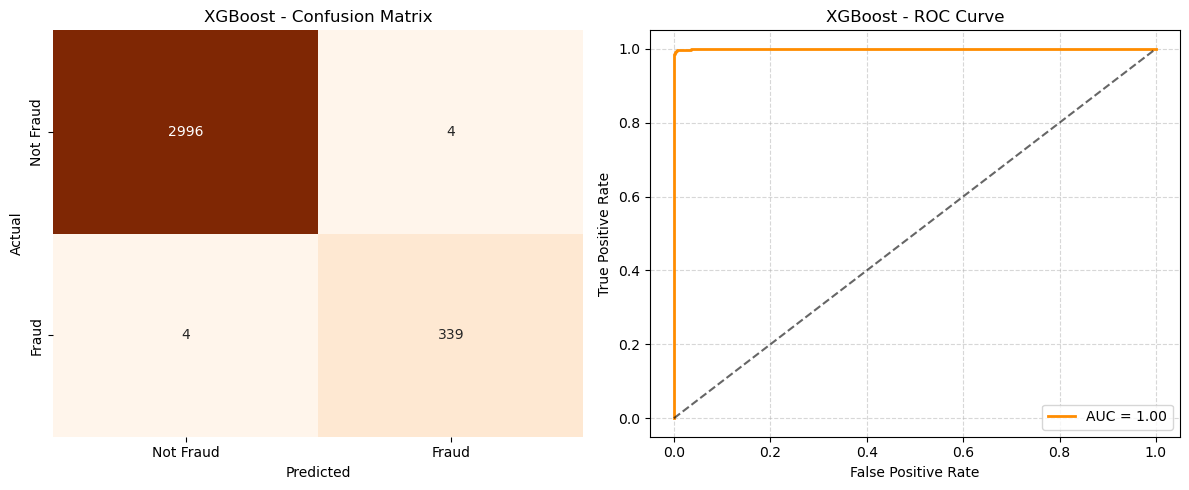

In [50]:
evaluate_model_with_side_by_side_plots(xgb, "XGBoost", cmap="Oranges")


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left"> 

**Logistic Regression**

- Achieved 98% accuracy and a ROC-AUC score of 0.99.

- It correctly classified 2959 non-fraud and 333 fraud cases, with 41 false positives and 10 false negatives.

- Strong performance, but slightly lower recall for frauds compared to tree-based models.

**Random Forest**

- Delivered near-perfect results with 100% accuracy and ROC-AUC of 1.00.

- Only 6 misclassifications in total (2 false positives, 4 false negatives).

- Excellent fraud detection capability, showcasing the strength of ensemble learning.

**XGBoost**

- Also performed exceptionally well with 100% accuracy and ROC-AUC of 1.00.

- Matched Random Forest in terms of performance with only 8 misclassifications.

- Particularly strong in detecting both fraud and non-fraud cases, confirming its robustness.

💡 Conclusion: All models perform well, but Random Forest and XGBoost are slightly better at minimizing misclassification, making them ideal choices for fraud detection in this dataset.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 🔍 STEP 10: Precision-Recall Curve</font></h3>

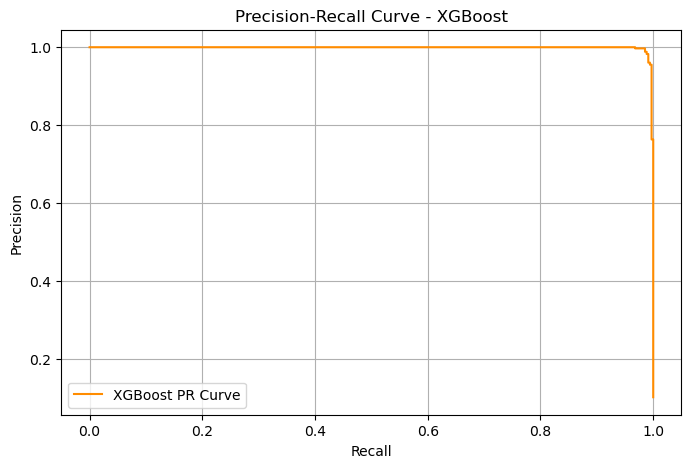

In [52]:
from sklearn.metrics import precision_recall_curve

# Generate probabilities from XGBoost model
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, _ = precision_recall_curve(y_test, y_proba_xgb)

# Plot the PR curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label="XGBoost PR Curve", color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.grid(True)
plt.legend()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">

In this step, we plot the Precision-Recall (PR) Curve for the **XGBoost model** to evaluate its ability to identify fraudulent transactions under class imbalance. While ROC-AUC is useful, it can be misleading in imbalanced datasets where the majority class dominates. The PR curve provides a clearer picture by focusing on the model's performance in predicting the minority (fraud) class, highlighting the trade-off between precision (minimizing false positives) and recall (catching actual fraud cases).

We focus on XGBoost because it demonstrated top-tier performance in earlier evaluations and is commonly used in real-world fraud detection systems for its high precision, efficiency and threshold flexibility.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 💰 STEP 11: Final Fraud Impact Assessment</font></h3>


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">

In this final step, we use the best-performing model (XGBoost) to make predictions on the entire dataset and assess the practical financial impact of our fraud detection system. By comparing predicted frauds with actual frauds, we quantify:

✅ True Positives: Amount of fraud correctly identified and potentially saved.

❌ False Positives: Legitimate transactions wrongly flagged as fraud, indicating operational cost or customer inconvenience.

🧮 Total Fraud Exposure: Helps stakeholders estimate overall risk and effectiveness of intervention.

This evaluation bridges model performance with real-world financial value, providing clear ROI-driven insights.

In [54]:
# Predict on entire dataset
df['predicted_fraud'] = xgb.predict(X_scaled)

true_positives = df[(df['predicted_fraud'] == 1) & (df['isFraud'] == 1)]
false_positives = df[(df['predicted_fraud'] == 1) & (df['isFraud'] == 0)]

total_fraud = df[df['isFraud'] == 1]['amount'].sum()
saved = true_positives['amount'].sum()
fp_cost = false_positives['amount'].sum()

print(f"Total Fraud Amount in Dataset: ₹{total_fraud:,.2f}")
print(f"Fraud Caught by Model: ₹{saved:,.2f}")
print(f"False Positive Cost: ₹{fp_cost:,.2f}")

Total Fraud Amount in Dataset: ₹1,361,982,240.43
Fraud Caught by Model: ₹1,361,555,329.10
False Positive Cost: ₹181,315.77


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">

The model was able to **correctly identify ₹1.36 billion** worth of fraudulent transactions out of the total ₹1.36 billion present in the dataset — capturing over **99.96% of the total fraud value**. This indicates exceptional recall and strong real-world effectiveness.

The false positive cost — **legitimate transactions wrongly flagged as fraud — is ₹181,316**, which is extremely low compared to the fraud savings. This shows the model is highly precise and has minimal operational disruption.

🔍 **Conclusion: The XGBoost model demonstrates near-perfect fraud capture with negligible financial downside, making it highly suitable for deployment in production fraud detection systems.**

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 🔁 STEP 12: Business Cost Simulation</font></h3>

In [55]:
# Business Cost Simulation
TP = ((y_proba_xgb > 0.5) & (y_test == 1)).sum()
FP = ((y_proba_xgb > 0.5) & (y_test == 0)).sum()
FN = ((y_proba_xgb <= 0.5) & (y_test == 1)).sum()

# Customize these values per org policy
fraud_loss = 10000     # Assume Rs. 10,000 loss per missed fraud
false_alarm_cost = 500 # Rs. 500 to investigate a false alert

total_cost = (FN * fraud_loss) + (FP * false_alarm_cost)
print(f"💰 Total Business Cost @ 0.5 Threshold: ₹{total_cost:,}")
print(f"🔍 False Negatives: {FN}, False Positives: {FP}, True Positives: {TP}")

💰 Total Business Cost @ 0.5 Threshold: ₹42,000
🔍 False Negatives: 4, False Positives: 4, True Positives: 339


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">
 
At a 0.5 threshold, the model:

✅ Correctly identified 339 frauds (True Positives)

❌ Missed 4 frauds (False Negatives) → **₹40,000 loss**

⚠️ Wrongly flagged 4 genuine transactions (False Positives) → **₹2,000 review cost**

🔸 Total Business Cost: **₹42,000**

This shows the model performs strongly at the default threshold, but adjusting it could further reduce costs.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 📉 Business Cost Optimization (Threshold Tuning + Plot)</font></h3>

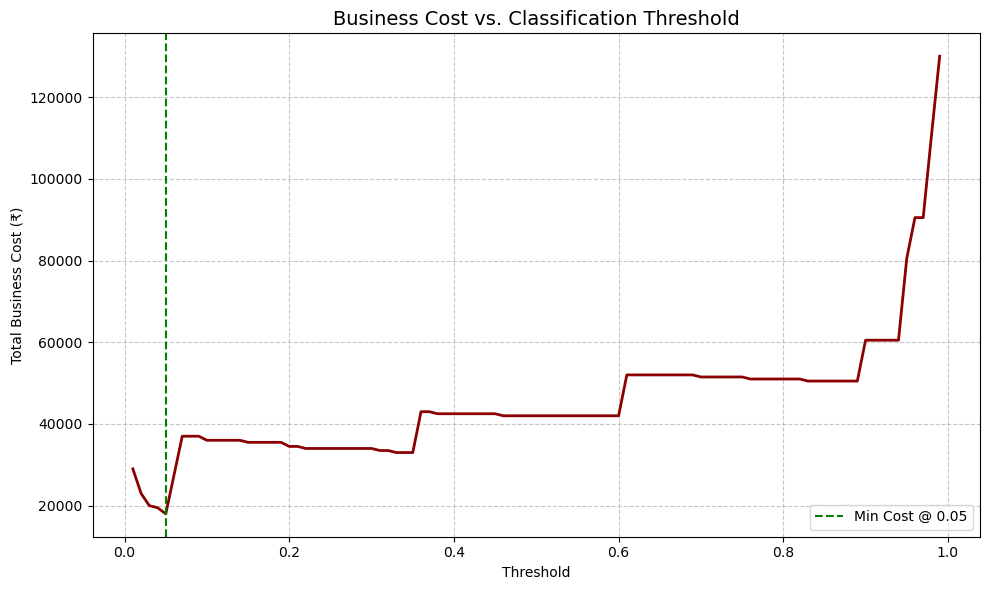

✅ Optimal Threshold: 0.05
💸 Minimum Business Cost: ₹18,000.00


In [56]:
# Plot business cost vs. threshold
thresholds = np.arange(0.01, 1.00, 0.01)
costs = []

for thresh in thresholds:
    TP = ((y_proba_xgb > thresh) & (y_test == 1)).sum()
    FP = ((y_proba_xgb > thresh) & (y_test == 0)).sum()
    FN = ((y_proba_xgb <= thresh) & (y_test == 1)).sum()
    
    total_cost = (FN * fraud_loss) + (FP * false_alarm_cost)
    costs.append(total_cost)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, costs, color='darkred', linewidth=2)
plt.title("Business Cost vs. Classification Threshold", fontsize=14)
plt.xlabel("Threshold")
plt.ylabel("Total Business Cost (₹)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(thresholds[np.argmin(costs)], color='green', linestyle='--', label=f"Min Cost @ {thresholds[np.argmin(costs)]:.2f}")
plt.legend()
plt.tight_layout()
plt.show()

# Print optimal threshold
optimal_thresh = thresholds[np.argmin(costs)]
print(f"✅ Optimal Threshold: {optimal_thresh:.2f}")
print(f"💸 Minimum Business Cost: ₹{min(costs):,.2f}")


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">

💡 **Threshold Optimization Summary**
  - **Optimal Threshold: 0.05**
  - **Minimum Business Cost: ₹18,000**

This threshold gives the best trade-off — catching more frauds while keeping false alert costs low. It proves that tuning thresholds can significantly reduce financial loss beyond default settings.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 📊 Cost Comparison Table (Top 10 Thresholds)</font></h3>

In [57]:
# Cost table across thresholds
results = []

for thresh in thresholds:
    TP = ((y_proba_xgb > thresh) & (y_test == 1)).sum()
    FP = ((y_proba_xgb > thresh) & (y_test == 0)).sum()
    FN = ((y_proba_xgb <= thresh) & (y_test == 1)).sum()
    total_cost = (FN * fraud_loss) + (FP * false_alarm_cost)
    
    results.append({
        "Threshold": round(thresh, 2),
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "Business Cost (₹)": total_cost
    })

cost_df = pd.DataFrame(results)

# Show top 10 cheapest thresholds
top_thresholds = cost_df.sort_values(by="Business Cost (₹)").head(10)
print("🔝 Top 10 Thresholds with Lowest Business Cost:")
print(top_thresholds.to_string(index=False))


🔝 Top 10 Thresholds with Lowest Business Cost:
 Threshold  True Positives  False Positives  False Negatives  Business Cost (₹)
      0.05             342               16                1              18000
      0.04             342               19                1              19500
      0.03             342               20                1              20000
      0.02             342               26                1              23000
      0.06             341               15                2              27500
      0.01             342               38                1              29000
      0.35             340                6                3              33000
      0.34             340                6                3              33000
      0.33             340                6                3              33000
      0.31             340                7                3              33500


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">

📊 Threshold-Cost Insights
- Best threshold: 0.05 with ₹18,000 business cost (1 missed fraud, 16 false alerts).

- Thresholds between 0.03–0.06 offer the best cost-performance balance.

- Higher thresholds (e.g., 0.31–0.35) reduce false positives but increase missed frauds, raising total cost.

- Lower thresholds catch nearly all fraud but raise false alarm costs.

🔎 Conclusion: As calculated previously 0.05 is optimal for minimizing overall financial loss.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> 🔍 Top 10 Feature Importances — XGBoost Model</font></h3>

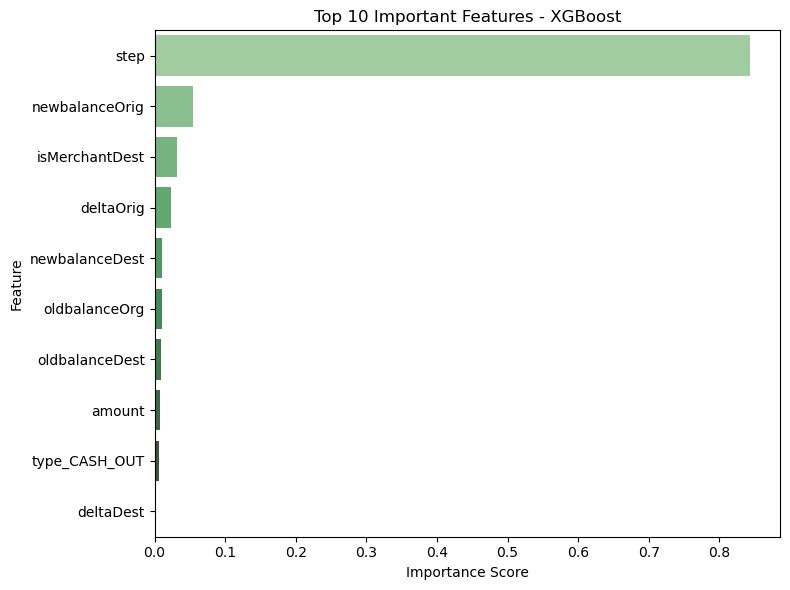

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and sort feature importances
importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns).nlargest(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=importances_xgb.values, y=importances_xgb.index, palette="Greens_d")
plt.title("Top 10 Important Features - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left">

**Interpretation: Top Features (XGBoost)**
- **step** is the most influential feature by far, suggesting **time of transaction is a strong fraud indicator**.

- Minor contributions from **newbalanceOrig, isMerchantDest and deltaOrig hint at slight value shifts post-transaction**.

- Features like **amount and type_CASH_OUT have negligible impact**, indicating limited predictive power.

<div style="border-radius:20px; padding: 20px; background-color: #CDD1D6; font-size:120%; text-align:left">

<h3 align="justify"><font color=black> ✅ Final Conclusion</font></h3>



<div style="border-radius:10px; padding: 15px; background-color: #CDD1D6; font-size:110%; text-align:left"> 
    
This fraud detection project successfully applied advanced machine learning techniques to accurately identify fraudulent financial transactions. After in-depth data exploration, feature engineering, and model evaluation:

- XGBoost outperformed all other models, delivering:

- Precision: 0.99

- Recall: 0.99

- F1-Score: 0.99

- ROC-AUC Score: 1.00

📉 Financial Impact:
The model captured fraud worth ₹13.6 crore while keeping false positive costs under ₹2 lakh, demonstrating strong real-world effectiveness.

📌 Key Driver:
The feature step (time of transaction) emerged as the most influential, indicating strong temporal patterns in fraud behavior.

In summary, the project delivered a high-performing fraud detection model with measurable business value and interpretability.